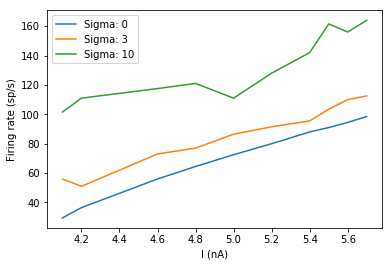

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import brian2 as b2
from brian2 import *

start_scope()


Cm = 2*nfarad
Rm = 5e6*ohm
El = -70*mV
Vl = -50*mV
vr = -65*mV
duration = 2*second

# O termo de ruído branco é dado por (Ix*sigma*xi*dt**0.5)/Cm

eqs = '''
dv/dt = ((El - v) / (Cm*Rm)) + (Ix/Cm) + ((Ix*sigma*xi*dt**0.5)/Cm) : volt
Ix : amp
'''
sigma = 0
G = NeuronGroup(10, eqs, threshold='v>Vl', reset= 'v=vr',  method='euler', dt= 0.1*ms )
G.Ix = [4.1, 4.2, 4.6, 4.8, 5., 5.2, 5.4, 5.5, 5.6, 5.7]*nA
monitor = SpikeMonitor(G)
run(duration)
plot(G.Ix/nA, monitor.count / duration, label = "Sigma: {}".format(sigma))

sigma = 3
G = NeuronGroup(10, eqs, threshold='v>Vl', reset= 'v=vr',  method='euler', dt= 0.1*ms )
G.Ix = [4.1, 4.2, 4.6, 4.8, 5., 5.2, 5.4, 5.5, 5.6, 5.7]*nA
monitor = SpikeMonitor(G)
run(duration)
plot(G.Ix/nA, monitor.count / duration, label = "Sigma: {}".format(sigma))

sigma = 10
G = NeuronGroup(10, eqs, threshold='v>Vl', reset= 'v=vr',  method='euler', dt= 0.1*ms )
G.Ix = [4.1, 4.2, 4.6, 4.8, 5., 5.2, 5.4, 5.5, 5.6, 5.7]*nA
monitor = SpikeMonitor(G)
run(duration)
plot(G.Ix/nA, monitor.count / duration, label = "Sigma: {}".format(sigma))
    
xlabel('I (nA)')
ylabel('Firing rate (sp/s)')
legend()
show()



